<a href="https://colab.research.google.com/github/piyushparadkar1/piyushparadkar1/blob/main/Credit_risk_modelling_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Credit risk modelling using Logistic Regression

## Problem Statement

Predict the loan defaulters using a Logistic Regression model on the credit risk data and calculate credit scores

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration, preprocessing and visualization
* implement Logistic Regression using manual code or using sklearn library
* evaluate the model using appropriate performance metrics
* develop a credit scoring system

## Dataset

The dataset chosen for this mini-project is the [Give Me Some Credit](https://cdn.iisc.talentsprint.com/CDS/Give_me_some_credit_BigML.pdf) dataset which can be used to build models for predicting loan repayment defaulters
#### Datafields

- **SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse
- **RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **age:** Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income
- **MonthlyIncome:** Monthly income
- **NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)
- **NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines:**	Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse:**	Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents:** Number of dependents in family excluding themselves (spouse, children etc.)

## Information

Credit risk arises when a corporate or individual borrower fails to meet their debt obligations. From the lender's perspective, credit risk could disrupt its cash flows or increase collection costs, since the lender may be forced to hire a debt collection agency to enforce the collection. The loss may be partial or complete, where the lender incurs a loss of part of the loan or the entire loan extended to the borrower.

Credit scoring algorithms, which calculate the probability of default, are the best methods that banks use to determine whether or not a loan should be granted. 

In order to build a credit scoring system, the following feature transformations are performed:

#### Weight of Evidence and Information value

Logistic regression is a commonly used technique in credit scoring for solving binary classification problems. Prior to model fitting, another iteration of variable selection is valuable to check if the newly WOE transformed variables are still good model candidates. Preferred candidate variables are those with higher information value having a linear relationship with the dependent variable, have good coverage across all categories, have a normal distribution, contain a notable overall contribution, and are relevant to the business.

**Weight of evidence** (WOE) is a powerful tool for feature representation and evaluation in data science. WOE can provide interpret able transformation to both categorical and numerical features. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable. Since it evolved from credit scoring world, it is generally described as a measure of the separation of good and bad customers. "Bad Customers" refers to the customers who defaulted on a loan. and "Good Customers" refers to the customers who paid back loan. WOE can be calculated using the below formula:

$$WOE = ln \left( \frac{\%   of  Non\_Events}{\%   of  Events} \right)$$

Steps to calculate WOE
* For a continuous variable, split data into 10 parts (or lesser depending on the distribution).
* Calculate the number of events and non-events in each group (bin)
* Calculate the % of events and % of non-events in each group.
* Calculate WOE by taking natural log of division of % of non-events and % of events

**Information value** is one of the most useful technique to select important variables in a predictive model. It helps to rank variables on the basis of their importance. The IV is calculated using the following formula :
$$IV = ∑ (\% of Non\_Events - \% of Events) * WOE$$

Read more about `WOE` and `IV` from the following [link](https://medium.com/@yanhuiliu104/credit-scoring-scorecard-development-process-8554c3492b2b)

### Import Neccesary Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
from matplotlib import pyplot as plt
import math
from xverse.transformer import MonotonicBinning,WOE
%matplotlib inline

### Load the dataset

In [ ]:
df = pd.read_csv('GiveMeSomeCredit.csv')
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [ ]:
columns = df.columns
print(columns)

df = df.drop('Unnamed: 0',axis = 1)
df.head()

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


#### Describe the all statistical properties of the train dataset

In [ ]:
df.describe(include = 'all')

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


#### Remove unwanted columns

In [ ]:
# df = df.drop('NumberOfDependents', axis = 1) # number of dependents adds no value to credit risk. 

#### Handle the missing data

Find the how many null values in the dataset and fill with mean or remove.

In [ ]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [ ]:
# df.dropna(inplace = True)
# df.isnull().sum()
df['NumberOfDependents'].fillna(df['NumberOfDependents'].mean(), inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

In [ ]:
df.nunique()

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13595
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          14
dtype: int64

### EDA &  Visualization 

#### Calculate the percentage of the target lebels and visualize with a graph

In [ ]:


#target variable is SeriousDlqin2yrs

target_counts = df.SeriousDlqin2yrs.value_counts(normalize=True)
print(target_counts)

0    0.93316
1    0.06684
Name: SeriousDlqin2yrs, dtype: float64


#### Plot the distribution of SeriousDlqin2yrs by age

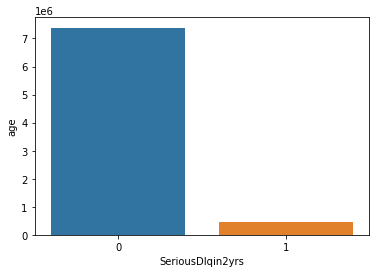

In [ ]:
df_1 = df.groupby(by = 'SeriousDlqin2yrs', as_index = False).sum()

sns.barplot(data = df_1, x = 'SeriousDlqin2yrs', y = 'age')

# 0 - Non defaulters 
# 1 = Defaulters

#### Calculate the correlation and plot the heatmap

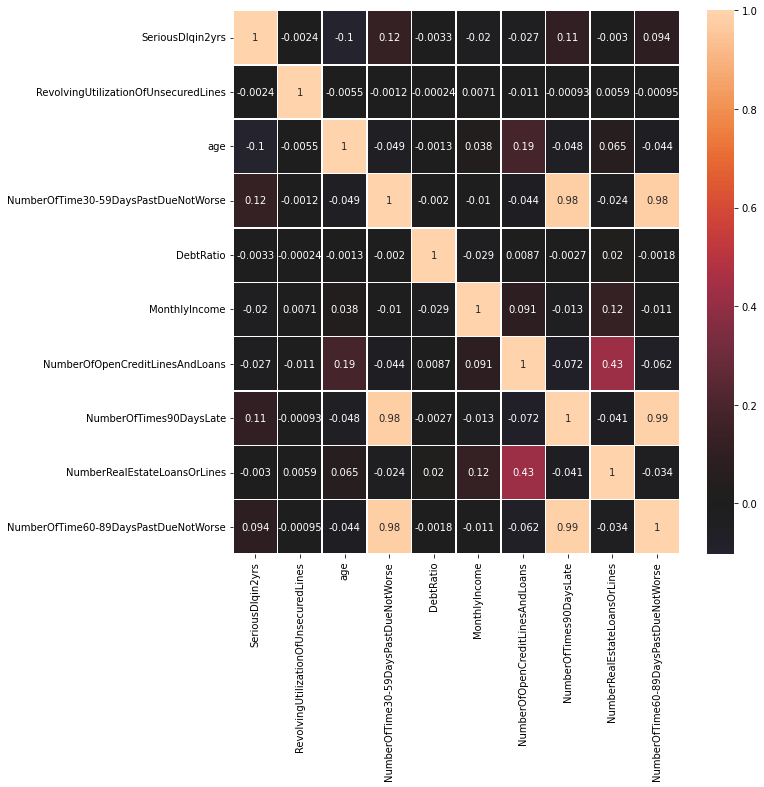

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, center=0)
plt.show()

In [ ]:
## NumberOfTime30-59DaysPastDueNotWorse and NumberofTimes90DaysLate are highly coorelated 
## NumberOfTime60-89DaysPastDueNotWorse and NumberofTimes90DaysLate are highly coorelated
df = df.drop('NumberOfTime30-59DaysPastDueNotWorse', axis=1)


### Data Engineering

#### Weight of Evidence and Information value

* Arrange the binning for each variable with different bins
    * For eg. Age = 49, Age_quantile_range = (48, 56)
* Calculate information value and chooose the best features based on the rules given below

| Information Value |	Variable Predictiveness |
| --- | --- |
| Less than 0.02	|  Not useful for prediction |
| 0.02 to 0.1	| Weak predictive Power |
|  0.1 to 0.3 | Medium predictive Power |
| 0.3 to 0.5 | Strong predictive Power |
| >0.5 | Suspicious Predictive Power |

* Calculate Weight of evidence for the selected variables

Hint: Use [xverse](https://towardsdatascience.com/introducing-xverse-a-python-package-for-feature-selection-and-transformation-17193cdcd067). It is a machine learning Python module in the space of feature engineering, feature transformation and feature selection. It provides pre-built functions for the above steps, such as binning and conversion to WoE.

In [ ]:
clf = MonotonicBinning()
y = df.SeriousDlqin2yrs
X = df.drop('SeriousDlqin2yrs', axis = 1)
clf.fit(X, y)

print(clf.bins)
output_bins = clf.bins

{'RevolvingUtilizationOfUnsecuredLines': array([0.00000000e+00, 5.44198870e-02, 3.79945496e-01, 5.07080000e+04]), 'age': array([  0.,  45.,  59., 109.]), 'DebtRatio': array([0.00000000e+00, 2.38192456e-01, 5.69938302e-01, 3.29664000e+05]), 'MonthlyIncome': array([      0.        ,    4700.        ,    6670.22123739,
       3008750.        ]), 'NumberOfOpenCreditLinesAndLoans': array([ 0.,  6., 10., 58.]), 'NumberOfTimes90DaysLate': array([ 0.,  1., 98.]), 'NumberRealEstateLoansOrLines': array([ 0.,  1., 54.]), 'NumberOfTime60-89DaysPastDueNotWorse': array([ 0.,  1., 98.]), 'NumberOfDependents': array([ 0.,  1., 20.])}


In [ ]:
clf = MonotonicBinning(custom_binning=output_bins) #output_bins was created earlier

out_X = clf.transform(X)
out_X.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,"(0.38, 50708.0]","(-0.001, 45.0]","(0.57, 329664.0]","(6670.221, 3008750.0]","(10.0, 58.0]","(-0.001, 1.0]","(1.0, 54.0]","(-0.001, 1.0]","(1.0, 20.0]"
1,"(0.38, 50708.0]","(-0.001, 45.0]","(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]"
2,"(0.38, 50708.0]","(-0.001, 45.0]","(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]"
3,"(0.0544, 0.38]","(-0.001, 45.0]","(-0.001, 0.238]","(-0.001, 4700.0]","(-0.001, 6.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]"
4,"(0.38, 50708.0]","(45.0, 59.0]","(-0.001, 0.238]","(6670.221, 3008750.0]","(6.0, 10.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 1.0]"


In [ ]:
clf = WOE()
clf.fit(X, y)
clf.woe_df # weight of evidence transformation dataset. This dataset will be used in making bivariate charts as well. 
iv_df = clf.iv_df #information value dataset
WOE = clf.woe_df[['Variable_Name', 'WOE']]
IV = clf.woe_df[['Variable_Name', 'Information_Value']]
IV.drop_duplicates(inplace=True)
IV.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 21
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Variable_Name      9 non-null      object 
 1   Information_Value  9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 216.0+ bytes


In [ ]:
WOE.head()

,Variable_Name,WOE
0,RevolvingUtilizationOfUnsecuredLines,-1.389301
1,RevolvingUtilizationOfUnsecuredLines,-0.802015
2,RevolvingUtilizationOfUnsecuredLines,0.916188
3,age,0.414666
4,age,0.043658


In [ ]:
IV

,Variable_Name,Information_Value
0,RevolvingUtilizationOfUnsecuredLines,0.935429
3,age,0.219843
6,DebtRatio,0.012360
9,MonthlyIncome,0.065725
12,NumberOfOpenCreditLinesAndLoans,0.023300
15,NumberOfTimes90DaysLate,0.484202
17,NumberRealEstateLoansOrLines,0.001605
19,NumberOfTime60-89DaysPastDueNotWorse,0.264824
21,NumberOfDependents,0.023730


In [ ]:
df = df.drop(['NumberRealEstateLoansOrLines', 'RevolvingUtilizationOfUnsecuredLines'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   age                                   150000 non-null  int64  
 2   DebtRatio                             150000 non-null  float64
 3   MonthlyIncome                         150000 non-null  float64
 4   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 5   NumberOfTimes90DaysLate               150000 non-null  int64  
 6   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 7   NumberOfDependents                    150000 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 9.2 MB


### Identify features,  target and split it into train and test

In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      120269 non-null  int64  
 1   age                                   120269 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  120269 non-null  int64  
 3   DebtRatio                             120269 non-null  float64
 4   MonthlyIncome                         120269 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       120269 non-null  int64  
 6   NumberOfTimes90DaysLate               120269 non-null  int64  
 7   NumberOfTime60-89DaysPastDueNotWorse  120269 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 12.3 MB


In [ ]:
y = df.SeriousDlqin2yrs
X = df.drop('SeriousDlqin2yrs', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 101)


In [ ]:
X_train.head()

,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
6144,67,0.008190,10500.0,16,0,0,0.0
129672,45,0.171193,25000.0,8,0,0,2.0
119146,67,0.314314,25833.0,8,0,0,0.0
83920,39,0.150207,13800.0,3,0,0,0.0
86824,38,1.162331,960.0,4,0,0,3.0


In [ ]:
y_train.head()

6144      0
129672    0
119146    0
83920     0
86824     0
Name: SeriousDlqin2yrs, dtype: int64

### Logistic Regression from scratch using gradient method

For Linear Regression, we had the hypothesis $yhat = w.X +b$ , whose output range was the set of all Real Numbers.
Now, for Logistic Regression our hypothesis is  $yhat = sigmoid(w.X + b)$ , whose output range is between 0 and 1 because by applying a sigmoid function, we always output a number between 0 and 1.

$yhat = \frac{1}{1 +e^{-(w.x+b)}}$

Hint: [logistic-regression-with-python](
https://medium.com/@ODSC/logistic-regression-with-python-ede39f8573c7)

In [ ]:
X_train.shape[0]

100500

In [ ]:
def sigmoid(x):
    return np.maximum(np.minimum(1 / (1 + np.exp(-x)), 0.9999), 0.0001)            

In [ ]:
def cost_function(x, y, theta):
    t = x.dot(theta)
    return (-np.sum(y * np.log(sigmoid(t)) + (1 - y) * np.log(1 - sigmoid(t))) / x.shape[0])


In [ ]:
def gradient_cost_function(x, y, theta):
    t = x.dot(theta)
    return x.T.dot(y - sigmoid(t)) / x.shape[0]

In [ ]:
def update_theta(x, y, theta, learning_rate):
    return theta + learning_rate * gradient_cost_function(x, y, theta)


In [ ]:
def train(x, y, learning_rate, iterations=500, threshold=0.0005):
    theta = np.zeros(x.shape[1])
    costs = []
    print("Start training")
    for i in range(iterations):
        theta = update_theta(x, y, theta, learning_rate)
        cost = cost_function(x, y, theta)
        print(f'Training step # {i}, -- Cost function:{cost:.4f}')
        costs.append({'cost':cost, 'weights': theta})
        if i > 15 and abs(costs[-2]['cost'] - costs[-1]['cost']) < threshold:
            break
    return theta, costs
Theta, costs = train(X_train, y_train, learning_rate=0.0001)

Start training
Training step # 0, -- Cost function:0.6140
Training step # 1, -- Cost function:0.6140
Training step # 2, -- Cost function:0.6141
Training step # 3, -- Cost function:0.6142
Training step # 4, -- Cost function:0.6143


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Training step # 5, -- Cost function:0.6144
Training step # 6, -- Cost function:0.6144
Training step # 7, -- Cost function:0.6144
Training step # 8, -- Cost function:8.4610
Training step # 9, -- Cost function:0.6138
Training step # 10, -- Cost function:0.6138
Training step # 11, -- Cost function:0.6138
Training step # 12, -- Cost function:0.6138
Training step # 13, -- Cost function:0.6139
Training step # 14, -- Cost function:0.6139
Training step # 15, -- Cost function:0.6139
Training step # 16, -- Cost function:0.6140


In [ ]:
print(Theta)

age                                    -0.002701
DebtRatio                              -0.018066
MonthlyIncome                          -0.341437
NumberOfOpenCreditLinesAndLoans        -0.000380
NumberOfTimes90DaysLate                 0.000196
NumberOfTime60-89DaysPastDueNotWorse    0.000171
NumberOfDependents                     -0.000008
dtype: float64


In [ ]:
def predict(x, theta):
    return (sigmoid(x.dot(theta)) >= 0.5).astype(int)

#Let’s compare, how predicted data are different than real:

def get_accuracy(x, y, theta):
    y_pred = predict(x, theta)
    return (y_pred == y).sum() / y.shape[0]
print(f'Accuracy on the training set: {get_accuracy(X_train, y_train,Theta)}')
print(f'Accuracy on the test set: {get_accuracy(X_test, y_test,Theta)}')

Accuracy on the training set: 0.9333830845771144
Accuracy on the test set: 0.9327070707070707


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


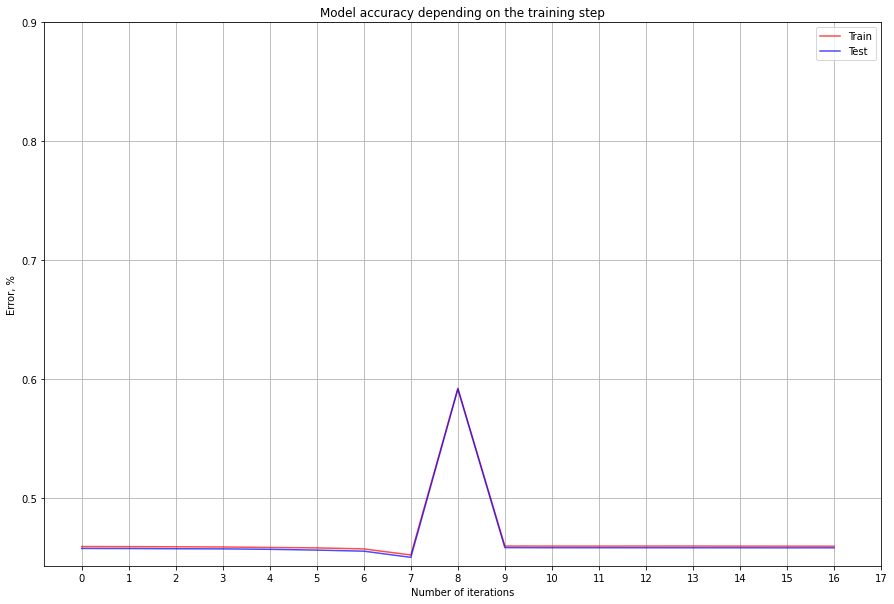

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Model accuracy depending on the training step')
plt.plot(np.arange(0, len(costs)),
[get_accuracy(X_train, y_train, c['weights']) for c in costs],
alpha=0.7,
label='Train', color='r')
plt.plot(np.arange(0, len(costs)),
[get_accuracy(X_test, y_test, c['weights']) for c in costs],
alpha=0.7,
label='Test', color='b')
plt.xlabel('Number of iterations')
plt.ylabel('Error, %')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(np.arange(0, len(costs)+1))
plt.yticks(np.arange(0.5, 1, 0.1))
plt.show()

### Implement the Logistic regression using sklearn

As there is imbalance in the class distribution, add weightage to the Logistic regression.

* Find the accuracy with class weightage in Logistic regression
* Find the accuracy without class weightage in Logistic regression

Hint: [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
# With weightage


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)





In [ ]:
X_train

array([[ 9.95869422e-01, -2.16381532e-01,  2.67992898e-01, ...,
        -6.38414398e-02, -5.80610874e-02, -6.89481493e-01],
       [-4.93848598e-01, -2.16279991e-01,  1.28614557e+00, ...,
        -6.38414398e-02, -5.80610874e-02,  1.12878449e+00],
       [ 9.95869422e-01, -2.16190836e-01,  1.34463669e+00, ...,
        -6.38414398e-02, -5.80610874e-02, -6.89481493e-01],
       ...,
       [-1.98474101e-02,  1.23113437e-01, -9.24308405e-04, ...,
        -6.38414398e-02, -5.80610874e-02, -6.89481493e-01],
       [-8.32420876e-01, -2.16252955e-01, -6.23098734e-02, ...,
        -6.38414398e-02,  1.80800073e-01,  2.03791749e+00],
       [-4.93848598e-01, -1.75895800e-01, -9.24308405e-04, ...,
        -6.38414398e-02, -5.80610874e-02, -6.89481493e-01]])

In [ ]:
classifier_w = LogisticRegression(random_state = 0,max_iter=1000,class_weight='balanced')
classifier_w.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=0)

In [ ]:
classifier_w.coef_

array([[-0.43782614, -0.01549883, -0.26393669,  0.09656592,  2.59731342,
         1.17686907,  0.08626974]])

In [ ]:
classifier_w.score(X_train, y_train)

0.7105273631840796

In [ ]:
y_pred_w = classifier_w.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_w)
print(cm)
accuracy_score(y_test, y_pred_w)
print(classification_report(y_test, y_pred_w))

[[33144 13025]
 [ 1184  2147]]
              precision    recall  f1-score   support

           0       0.97      0.72      0.82     46169
           1       0.14      0.64      0.23      3331

    accuracy                           0.71     49500
   macro avg       0.55      0.68      0.53     49500
weighted avg       0.91      0.71      0.78     49500



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


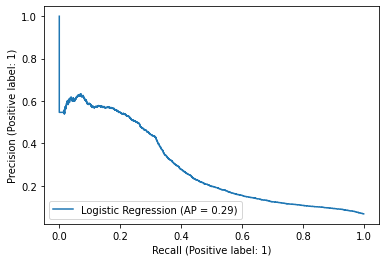

In [ ]:
# Use sklearn to plot precision-recall curves

from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(classifier_w, X_test, y_test, name = 'Logistic Regression')

In [ ]:
# Without weightage
classifier = LogisticRegression(random_state = 0,max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
classifier.coef_

array([[-0.41549567, -0.0135241 , -0.41201107,  0.04662129,  2.40201819,
        -2.26345637,  0.11284315]])

In [ ]:
classifier.score(X_train, y_train)

0.9340398009950249

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

[[46091    78]
 [ 3235    96]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     46169
           1       0.55      0.03      0.05      3331

    accuracy                           0.93     49500
   macro avg       0.74      0.51      0.51     49500
weighted avg       0.91      0.93      0.90     49500



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


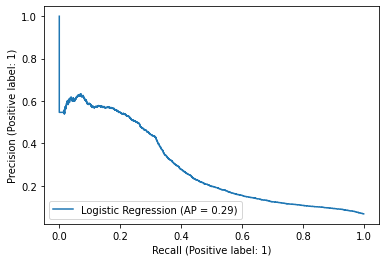

In [ ]:
# Use sklearn to plot precision-recall curves

from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(classifier_w, X_test, y_test, name = 'Logistic Regression')

### Credit scoring 

When scaling the model into a scorecard, we will need both the Logistic Regression coefficients from model fitting as well as the transformed WoE values. We will also need to convert the score from the model from the log-odds unit to a points system.
For each independent variable Xi, its corresponding score is:

$Score = \sum_{i=1}^{n} (-(β_i × WoE_i + \frac{α}{n}) × Factor + \frac{Offset}{n})$

Where:

βi — logistic regression coefficient for the variable Xi

α — logistic regression intercept

WoE — Weight of Evidence value for variable Xi

n — number of independent variable Xi in the model

Factor, Offset — known as scaling parameter

  - Factor = pdo / ln(2); pdo is points to double the odds
  - Offset = Round_of_Score - {Factor * ln(Odds)}

In [ ]:
# Scaling factors
factor = 20/np.log(2)
offset = 600 - ( factor * np.log(50))
factor, offset

(28.85390081777927, 487.1228762045055)

In [ ]:
WOE

,Variable_Name,WOE
0,RevolvingUtilizationOfUnsecuredLines,-1.389301
1,RevolvingUtilizationOfUnsecuredLines,-0.802015
2,RevolvingUtilizationOfUnsecuredLines,0.916188
3,age,0.414666
4,age,0.043658
5,age,-0.804528
6,DebtRatio,-0.108543
7,DebtRatio,-0.054162
8,DebtRatio,0.146810
9,MonthlyIncome,0.300624


In [ ]:
col = list(X.columns)
coeff = list(classifier_w.coef_[0])
coeff = pd.DataFrame(zip(col,coeff), columns=['Variable_Name','coefficient'])
coeff.set_index('Variable_Name',inplace = True)
coeff

,coefficient
Variable_Name,
age,-0.437826
DebtRatio,-0.015499
MonthlyIncome,-0.263937
NumberOfOpenCreditLinesAndLoans,0.096566
NumberOfTimes90DaysLate,2.597313
NumberOfTime60-89DaysPastDueNotWorse,1.176869
NumberOfDependents,0.086270


In [ ]:
classifier_w.coef_

array([[-0.43782614, -0.01549883, -0.26393669,  0.09656592,  2.59731342,
         1.17686907,  0.08626974]])

In [ ]:
# we have to do index matching of coeffient df and information value df 

df_woe_copy = WOE.copy()
df_woe_copy.head()
df_woe_copy.set_index('Variable_Name', inplace = True)


In [ ]:
df_woe_copy.head()

,WOE
Variable_Name,
RevolvingUtilizationOfUnsecuredLines,-1.389301
RevolvingUtilizationOfUnsecuredLines,-0.802015
RevolvingUtilizationOfUnsecuredLines,0.916188
age,0.414666
age,0.043658


In [ ]:
# to create new index matched column 

df_woe_copy['coefficient'] = coeff['coefficient']
for i in df_woe_copy.index:
    for j in coeff.index:
        if i == j:
            df_woe_copy['coefficient'][j] = coeff.loc[j][0]


In [ ]:
df_woe_copy.reset_index(inplace = True)
df_woe_copy.dropna(inplace= True)

In [ ]:
df_woe_copy.head(40)


,Variable_Name,WOE,coefficient
3,age,0.414666,-0.437826
4,age,0.043658,-0.437826
5,age,-0.804528,-0.437826
6,DebtRatio,-0.108543,-0.015499
7,DebtRatio,-0.054162,-0.015499
8,DebtRatio,0.146810,-0.015499
9,MonthlyIncome,0.300624,-0.263937
10,MonthlyIncome,-0.081528,-0.263937
11,MonthlyIncome,-0.336321,-0.263937
12,NumberOfOpenCreditLinesAndLoans,0.161831,0.096566


In [ ]:
coeff.head(9)

,coefficient
Variable_Name,
age,-0.437826
DebtRatio,-0.015499
MonthlyIncome,-0.263937
NumberOfOpenCreditLinesAndLoans,0.096566
NumberOfTimes90DaysLate,2.597313
NumberOfTime60-89DaysPastDueNotWorse,1.176869
NumberOfDependents,0.086270


In [ ]:
#calculate score 

from numpy.ma.core import append
score = []
n = len(df_woe_copy.index)
for i in df_woe_copy.index:
        score.append((-1 * (df_woe_copy.coefficient[i] * df_woe_copy.WOE[i] + (classifier_w.intercept_[0] / n)) * factor)+(offset/n))
print(score)

[32.48660817170965, 27.79966688943697, 17.084542438105288, 27.19959360078319, 27.223912625864152, 27.31378754195996, 29.53756484035958, 26.627249027432622, 24.686849884743513, 26.797224861860805, 27.80621052890733, 27.370707950160394, 40.48855048571288, -185.82487858941587, 30.575621677792604, -66.37488403704913, 27.467847107535107, 26.5775775406142]


In [ ]:
sum(score)

194.84375254651326

### Performance Metrics 

#### Precision

In [ ]:

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred_w)

print(f'accuracy score = {accuracy_score(y_test, y_pred_w)}')
print(f'precision = TP/(TP+FP) = {cm[1,1]/(cm[1,1]+cm[0,1])}')


accuracy score = 0.712949494949495
precision = TP/(TP+FP) = 0.14151067756393357


#### Recall

In [ ]:
print(f'recall = TP/(TP+FN) = {cm[1,1]/(cm[1,0]+cm[0,1])}')


recall = TP/(TP+FN) = 0.15110141459638257


#### Classification Report

In [ ]:
print(classification_report(y_test, y_pred_w))

              precision    recall  f1-score   support

           0       0.97      0.72      0.82     46169
           1       0.14      0.64      0.23      3331

    accuracy                           0.71     49500
   macro avg       0.55      0.68      0.53     49500
weighted avg       0.91      0.71      0.78     49500



#### Confusion matrix

In [ ]:
print(cm)

[[33144 13025]
 [ 1184  2147]]
